In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
df_nfc = pd.read_csv('https://raw.githubusercontent.com/som-choudhary/Airbnb/main/Airbnb_new.csv')

### Reading , becoming familiar with the data and cleaning it

In [3]:
df_nfc.head()

,Unnamed: 0,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,10/19/18,0.21,6.0,365.0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,NaN,5/21/19,0.38,2.0,NaN
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,NaN,harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,07-05-2019,4.64,1.0,194.0
4,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,murray hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,6/22/19,0.59,1.0,129.0


In [4]:
df_nfc.info()
# on initial check all the data appears to be in correct order i.e. the data types are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42638 entries, 0 to 42637
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      42638 non-null  int64  
 1   id                              42638 non-null  int64  
 2   name                            42624 non-null  object 
 3   host_id                         42638 non-null  int64  
 4   host_name                       42582 non-null  object 
 5   borough                         42571 non-null  object 
 6   neighbourhood                   42638 non-null  object 
 7   latitude                        42607 non-null  float64
 8   longitude                       42609 non-null  float64
 9   room_type                       42552 non-null  object 
 10  price                           42602 non-null  float64
 11  minimum_nights                  42604 non-null  float64
 12  number_of_reviews               

In [5]:
df_nfc.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,42638.000000,4.263800e+04,4.263800e+04,42607.000000,42609.000000,42602.000000,42604.000000,42613.000000,33902.000000,42622.000000,42596.000000
mean,24323.437544,1.892386e+07,6.633856e+07,40.725488,-73.949830,148.516173,6.974298,23.045080,1.346574,6.840036,111.562447
std,14062.225405,1.094655e+07,7.755554e+07,0.054140,0.046089,235.828980,20.295628,44.411525,1.636901,32.246048,131.392817
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,12117.250000,9.410163e+06,7.650650e+06,40.688225,-73.979220,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,24300.500000,1.956904e+07,3.028359e+07,40.718130,-73.954370,100.000000,3.000000,5.000000,0.690000,1.000000,42.000000
75%,36444.500000,2.897789e+07,1.056342e+08,40.756690,-73.933800,174.000000,5.000000,23.000000,2.000000,2.000000,224.000000
max,48892.000000,3.648543e+07,2.743115e+08,40.904840,-73.712990,10000.000000,1250.000000,629.000000,20.940000,327.000000,365.000000


## Cleaning Data and finding out the null values and dropping columns where null is greater than 20%

In [6]:
df_nfc.isna().sum()

Unnamed: 0                           0
id                                   0
name                                14
host_id                              0
host_name                           56
borough                             67
neighbourhood                        0
latitude                            31
longitude                           29
room_type                           86
price                               36
minimum_nights                      34
number_of_reviews                   25
last_review                       8746
reviews_per_month                 8736
calculated_host_listings_count      16
availability_365                    42
dtype: int64

In [7]:
# Finding out the percentage of null values
df_nfc.isna().sum() *100 / len(df_nfc)
# last review should be dropped and (reviews_per month maybe)

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.032835
host_id                            0.000000
host_name                          0.131338
borough                            0.157137
neighbourhood                      0.000000
latitude                           0.072705
longitude                          0.068014
room_type                          0.201698
price                              0.084432
minimum_nights                     0.079741
number_of_reviews                  0.058633
last_review                       20.512219
reviews_per_month                 20.488766
calculated_host_listings_count     0.037525
availability_365                   0.098504
dtype: float64

In [8]:
df_nfc['reviews_per_month'].describe()

count    33902.000000
mean         1.346574
std          1.636901
min          0.010000
25%          0.190000
50%          0.690000
75%          2.000000
max         20.940000
Name: reviews_per_month, dtype: float64

In [9]:
# dropping reviews_per_month
df_nfc.drop(['reviews_per_month','last_review'], axis=1 , inplace=True)

In [10]:
# Cross checking
df_nfc.isna().sum()

Unnamed: 0                         0
id                                 0
name                              14
host_id                            0
host_name                         56
borough                           67
neighbourhood                      0
latitude                          31
longitude                         29
room_type                         86
price                             36
minimum_nights                    34
number_of_reviews                 25
calculated_host_listings_count    16
availability_365                  42
dtype: int64

In [11]:
df_nfc= df_nfc.drop(df_nfc[df_nfc['name'].isnull()].index)


In [12]:
df_nfc.isna().sum()

Unnamed: 0                         0
id                                 0
name                               0
host_id                            0
host_name                         56
borough                           67
neighbourhood                      0
latitude                          31
longitude                         29
room_type                         86
price                             36
minimum_nights                    34
number_of_reviews                 25
calculated_host_listings_count    16
availability_365                  42
dtype: int64

In [13]:
# removing where host_name , borough where they are null
df_nfc = df_nfc.drop(df_nfc[df_nfc['host_name'].isnull()].index)
df_nfc = df_nfc.drop(df_nfc[df_nfc['borough'].isnull()].index)
# latitude and longitude also have to be removed where null are present
df_nfc = df_nfc.drop(df_nfc[df_nfc['latitude'].isnull()].index)
df_nfc = df_nfc.drop(df_nfc[df_nfc['longitude'].isnull()].index)

In [14]:
df_nfc.isna().sum()

Unnamed: 0                         0
id                                 0
name                               0
host_id                            0
host_name                          0
borough                            0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                         66
price                             23
minimum_nights                    22
number_of_reviews                 22
calculated_host_listings_count    10
availability_365                  35
dtype: int64

In [15]:
df_nfc['room_type'].value_counts()


Entire home/apt    21703
Private room       19739
Shared room          950
Name: room_type, dtype: int64

In [16]:
df_nfc['room_type'] = df_nfc['room_type'].fillna('Entire home/apt')

In [17]:
# CROSS CHECK
df_nfc.isna().sum()

Unnamed: 0                         0
id                                 0
name                               0
host_id                            0
host_name                          0
borough                            0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             23
minimum_nights                    22
number_of_reviews                 22
calculated_host_listings_count    10
availability_365                  35
dtype: int64

In [18]:
df_nfc['price'].describe()
# understandong the distrubution of price before  imputing the null values with mean or median

count    42435.000000
mean       148.575374
std        236.184376
min          0.000000
25%         65.000000
50%        100.000000
75%        174.000000
max      10000.000000
Name: price, dtype: float64

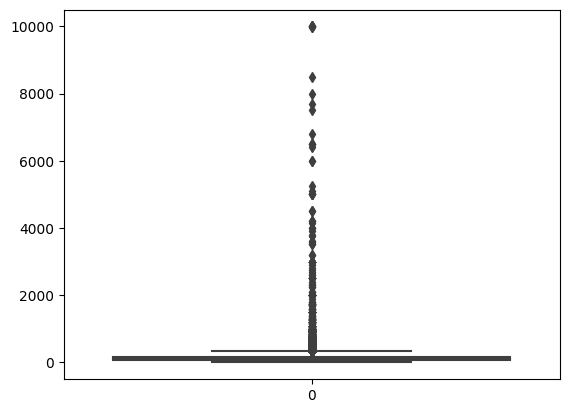

In [19]:
sns.boxplot(df_nfc['price'])
plt.show()
# median will be more suitable for the imputation as the outlier 10000 are less thus data will be less skewered

In [20]:
df_nfc['price'] = df_nfc['price'].fillna(df_nfc['price'].median())

In [21]:
# cross check
df_nfc.isna().sum()

Unnamed: 0                         0
id                                 0
name                               0
host_id                            0
host_name                          0
borough                            0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                    22
number_of_reviews                 22
calculated_host_listings_count    10
availability_365                  35
dtype: int64

In [22]:
df_nfc['minimum_nights'].describe()
# based on the observation we shall impute with medium


count    42436.000000
mean         6.975328
std         20.324644
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [23]:
df_nfc['minimum_nights'] = df_nfc['minimum_nights'].fillna(df_nfc['minimum_nights'].median())

In [24]:
# cross check
df_nfc.isna().sum()

Unnamed: 0                         0
id                                 0
name                               0
host_id                            0
host_name                          0
borough                            0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                 22
calculated_host_listings_count    10
availability_365                  35
dtype: int64

In [25]:
df_nfc['number_of_reviews'].describe()

count    42436.000000
mean        23.011877
std         44.357978
min          0.000000
25%          1.000000
50%          5.000000
75%         23.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [26]:
df_nfc['number_of_reviews'] = df_nfc['number_of_reviews'].fillna(df_nfc['number_of_reviews'].median())

In [27]:
# cross check
df_nfc.isna().sum()

Unnamed: 0                         0
id                                 0
name                               0
host_id                            0
host_name                          0
borough                            0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count    10
availability_365                  35
dtype: int64

In [28]:
df_nfc['calculated_host_listings_count'].describe()

count    42448.000000
mean         6.844704
std         32.249686
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [29]:
df_nfc['calculated_host_listings_count'] = df_nfc['calculated_host_listings_count'].fillna(df_nfc['calculated_host_listings_count'].median())

In [30]:
# cross check
df_nfc.isna().sum()

Unnamed: 0                         0
id                                 0
name                               0
host_id                            0
host_name                          0
borough                            0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                  35
dtype: int64

In [31]:
df_nfc['availability_365'].describe()

count    42423.000000
mean       111.517267
std        131.348500
min          0.000000
25%          0.000000
50%         42.000000
75%        224.000000
max        365.000000
Name: availability_365, dtype: float64

In [32]:
df_nfc['availability_365'] = df_nfc['availability_365'].fillna(df_nfc['availability_365'].mean())

In [33]:
# cross check
df_nfc.isna().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Sanity Checks

In [34]:
df_nfc.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [35]:
df_nfc['borough'].value_counts()

Brooklyn         19275
Manhattan        16905
Queens            5165
Bronx              690
Staten Island      340
Queen               63
Brookly              9
Manhatteen           5
Manhattn             4
Mahattan             2
Name: borough, dtype: int64

In [36]:
# correcting Manhattan 's name
df_nfc['borough']= df_nfc['borough'].replace('Manhatteen','Manhattan')
df_nfc['borough']= df_nfc['borough'].replace('Manhatteen ','Manhattan')
df_nfc['borough']= df_nfc['borough'].replace('Manhattn','Manhattan')
df_nfc['borough']= df_nfc['borough'].replace('Mahattan','Manhattan')

In [37]:
df_nfc['borough'].value_counts()

Brooklyn         19275
Manhattan        16916
Queens            5165
Bronx              690
Staten Island      340
Queen               63
Brookly              9
Name: borough, dtype: int64

In [38]:
df_nfc['borough'] = df_nfc['borough'].replace('Queen','Queens')
df_nfc['borough'] = df_nfc['borough'].replace('Brookly','Brooklyn')

In [39]:
df_nfc['borough'].value_counts()

Brooklyn         19284
Manhattan        16916
Queens            5228
Bronx              690
Staten Island      340
Name: borough, dtype: int64

In [40]:
df_nfc.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [41]:
df_nfc['room_type'].value_counts()

Entire home/apt    21769
Private room       19739
Shared room          950
Name: room_type, dtype: int64

### Outlier Detection

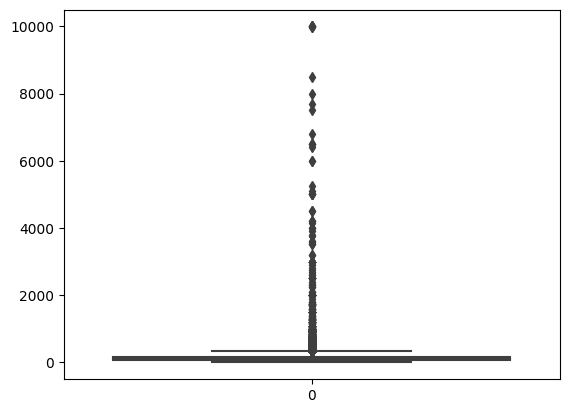

In [42]:
# Price is the fundamental or the key aspect on which we need to focus to we should remove / reduce the outliers in it as it may skew the analysis
sns.boxplot(df_nfc['price'])
plt.show()
# ???? ask this as a doubt
# Too many outliers I think it is best to leave the outliers as they can provide us with a more accurate picture of the data

In [43]:
df_nfc['price'].value_counts()

150.0     1774
100.0     1767
50.0      1401
60.0      1348
75.0      1213
          ... 
1177.0       1
573.0        1
2695.0       1
577.0        1
421.0        1
Name: price, Length: 633, dtype: int64

# In terms of insights 
1)Queens and Staten island and Bronx are cheaper with having most price lying in the range og 0 to 3000 .. 
2)Staten having the lowest
3)Brooklyn and Manhattan have prices of all ranges

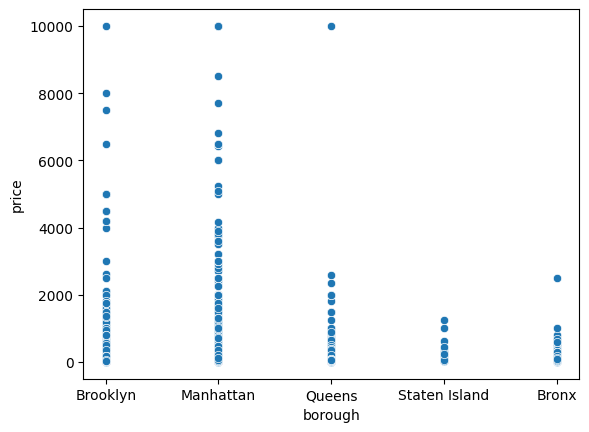

In [44]:
# chart to analysis the relation between neighbourhood, and price
sns.scatterplot(data=df_nfc,x=df_nfc['borough'],y=df_nfc['price'])
plt.show()

In [50]:
df_nfc_neighbourhood = df_nfc.filter(['neighbourhood','price'])

In [59]:
df_nfc_neighbourhood= df_nfc_neighbourhood.sort_values(by=['price'],ascending=False)

In [60]:
df_nfc_10_neighbourhood = df_nfc_neighbourhood.head(10)

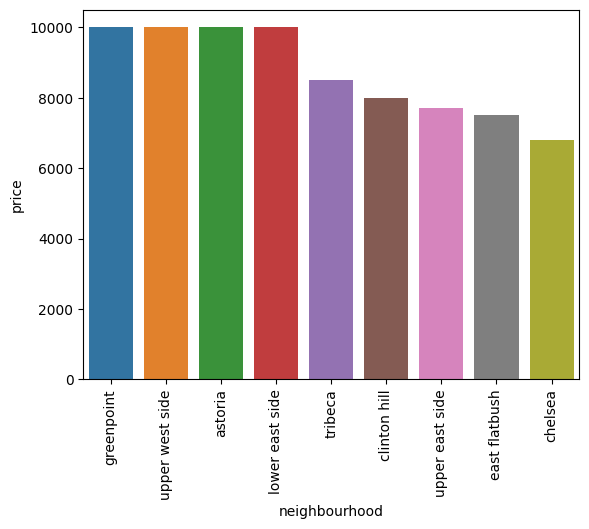

In [61]:
sns.barplot(data =df_nfc_10_neighbourhood,x='neighbourhood',y='price')
plt.xticks(rotation=90)
plt.show()

### Inference
Greenpoint , Upper West Side , Astoria amd Lower East Side are all tied up for the highest price charged

In [79]:
# Host analysis
top20_host = df_nfc['host_id'].value_counts()

In [80]:
# data_of_top20_hosts= df_nfc[df_nfc['host_id'] in top20_host.index]

In [82]:
# top 20 neighbourhoods by count or reoccuring the most
top20_reoccuring_neighbourhoods = df_nfc['neighbourhood'].value_counts().head(20)

In [83]:
top20_reoccuring_neighbourhoods
# williamsburg is the most rented out neighbourhood followed up by bedford-stuyvesant

williamsburg          3897
bedford-stuyvesant    3688
harlem                2642
bushwick              2453
upper west side       1960
east village          1845
upper east side       1788
crown heights         1559
midtown               1539
greenpoint            1106
chelsea               1105
lower east side        907
astoria                898
washington heights     896
financial district     741
flatbush               616
clinton hill           569
long island city       537
park slope             501
east flatbush          496
Name: neighbourhood, dtype: int64

In [90]:
# Borough vs Price
pd.pivot_table(data=df_nfc,index=['borough'],values=['price'])

# As expected Manhattan has the highest followed up by Brooklyn 

,price
borough,
Bronx,87.415942
Brooklyn,124.263586
Manhattan,194.899917
Queens,99.400918
Staten Island,99.661765


In [92]:
# Neighbourhood vs Price
pivot_price_neigh = pd.pivot_table(data=df_nfc,index=['neighbourhood'],values=['price'])


In [97]:
Top20_neighborhood_price_relation = pivot_price_neigh.sort_values(by=['price'],ascending=False).head(20)

In [99]:
Top20_neighborhood_price_relation
# inference tribeca , riverdale ,prince's bay	 are the highest 

,price
neighbourhood,
tribeca,492.760000
riverdale,442.090909
prince's bay,409.500000
flatiron district,344.217949
soho,287.103352
midtown,282.419103
neponsit,274.666667
greenwich village,264.061697
chelsea,250.335747


In [101]:
# Room type analsysis
df_nfc['room_type'].value_counts()

Entire home/apt    21769
Private room       19739
Shared room          950
Name: room_type, dtype: int64

In [103]:
pivot_price_room = pd.pivot_table(data=df_nfc,index=['room_type'],values=['price'])

In [105]:
pivot_price_room
# entire room is the most expensive which was as expected but in  private and shared the difference is relatively less

,price
room_type,
Entire home/apt,207.301576
Private room,87.610213
Shared room,68.431579


### Exporting the CSV file 


In [108]:
df_nfc.to_csv('cleaned_nyc.csv')